<a href="https://colab.research.google.com/github/sangeetavarri/AI4ALL_Bone_Fracture_Classification/blob/main/BoneFractureClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
import cv2
import os
import random
#!pip install --upgrade --force-reinstall ultralytics
!pip install ultralytics
import matplotlib.pyplot as plt
from ultralytics import YOLO
from google.colab.patches import cv2_imshow
# Download latest version
path = kagglehub.dataset_download("pkdarabi/bone-fracture-detection-computer-vision-project")

print("Path to dataset files:", path)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.0/887.0 kB 39.5 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 84.1M/84.1M [00:03<00:00, 28.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/pkdarabi/bone-fracture-detection-computer-vision-project/versions/2


In [ ]:
#pip install ultralytics

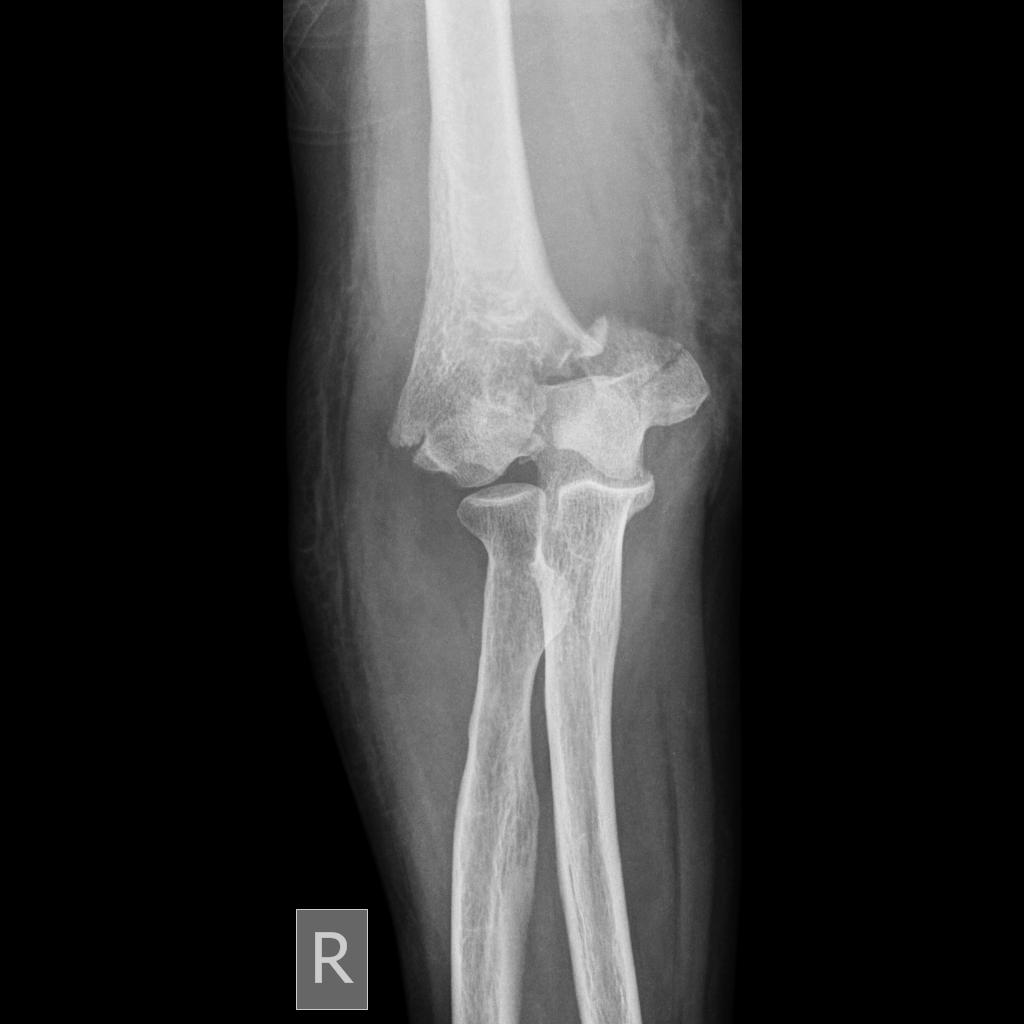

In [ ]:
train_images_1 = path + "/BoneFractureYolo8/train/images/distal-humeral-fractures-2-_JPEG.rf.39ba3f53047ecb4064613850a1c76fc1.jpg"
train_images =path + "/BoneFractureYolo8/train/images"
train_labels =path + "/BoneFractureYolo8/train/labels"

test_images = path + "/BoneFractureYolo8/test/images"
test_labels = path + "/BoneFractureYolo8/test/labels"

valid_images  = path + "/BoneFractureYolo8/valid/images"
valid_labels = path + "/BoneFractureYolo8/valid/labels"
#print(train)

config_file = path + "/BoneFractureYolo8/data.yaml"
img = cv2.imread(train_images_1, cv2.IMREAD_UNCHANGED)
#print(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(img)

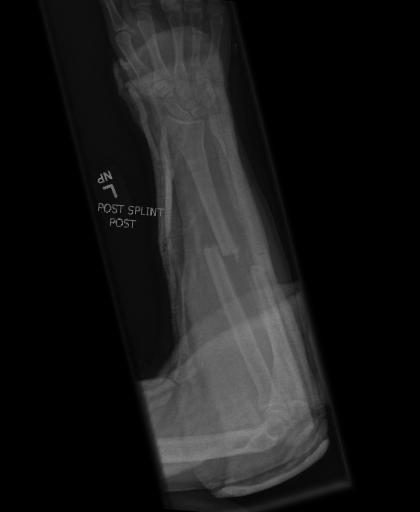

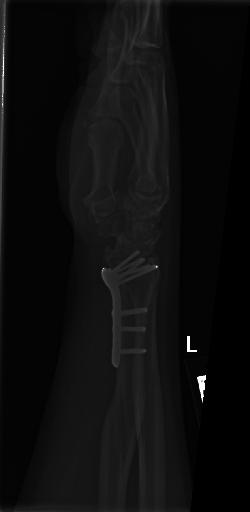

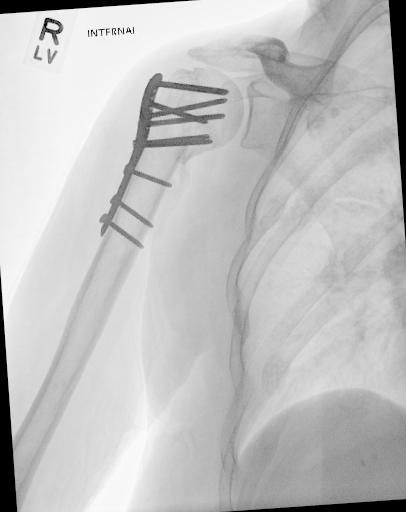

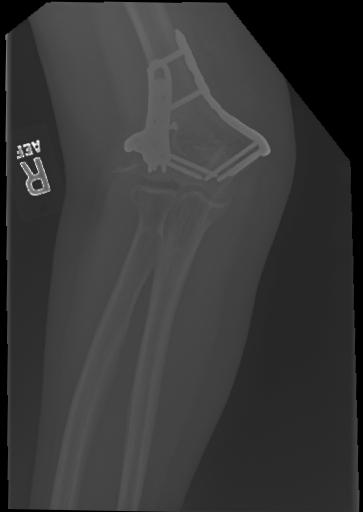

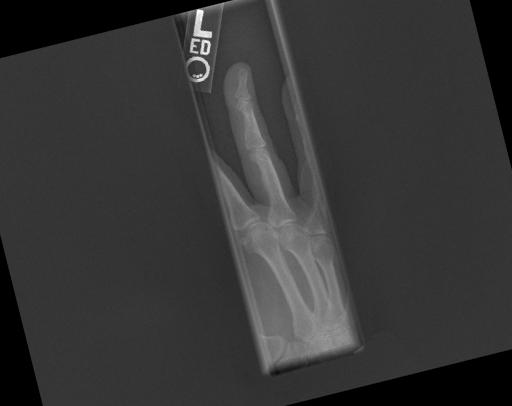

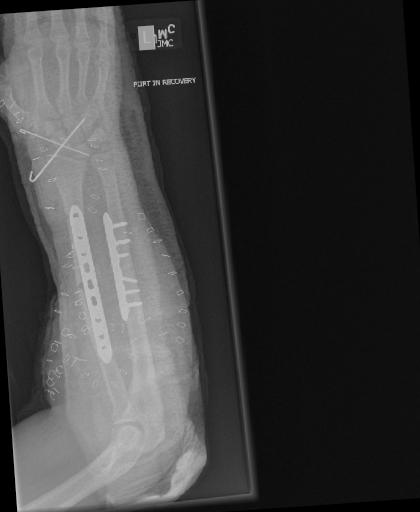

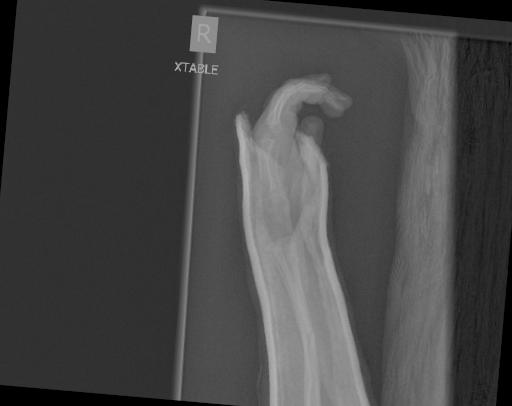

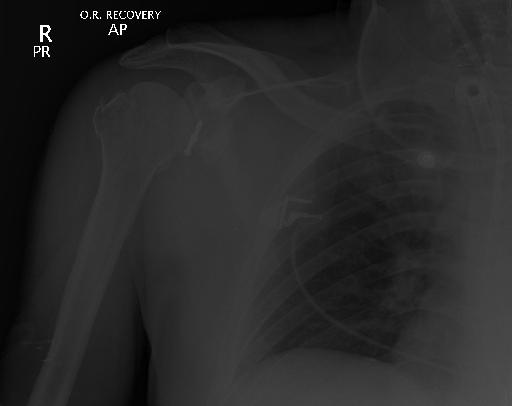

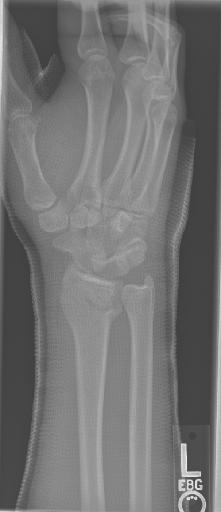

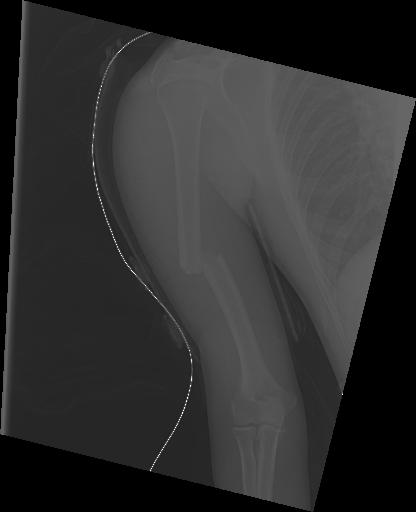

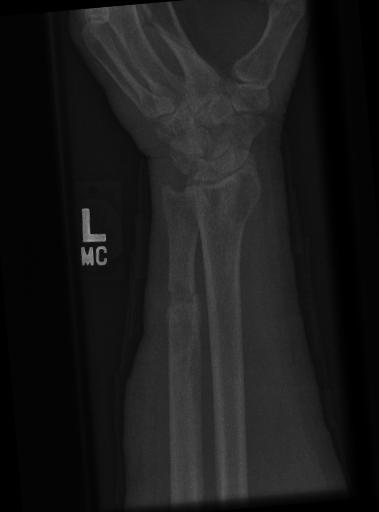

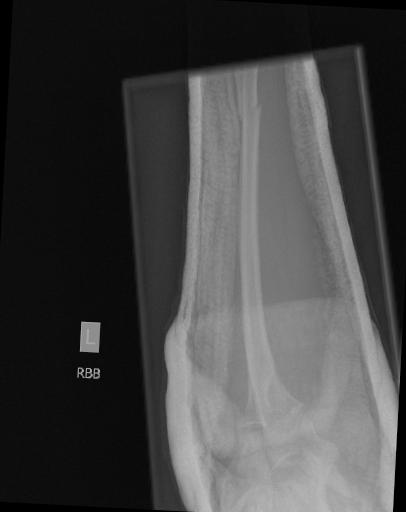

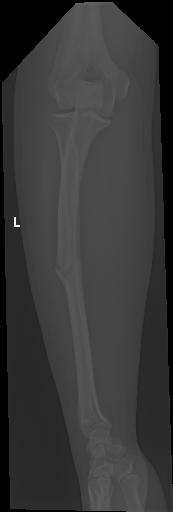

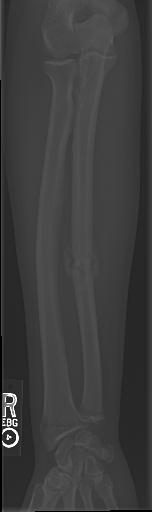

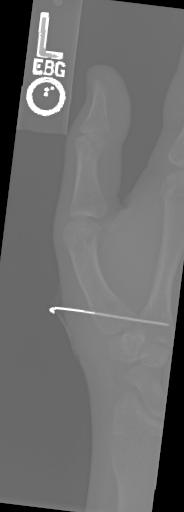

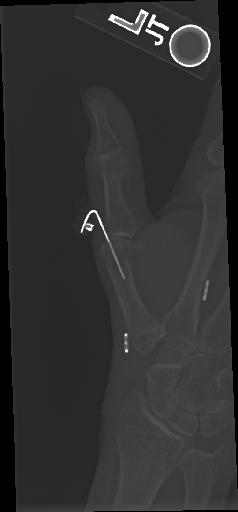

In [ ]:
image_files = os.listdir(train_images)

# Choose 16 random image files from the list
random_images = random.sample(image_files, 16)

# Set up the plot
#fig, axs = plt.subplots(4, 4, figsize=(16, 16))

# Loop over the random images and plot the object detections
for i, image_file in enumerate(random_images):
    #row /= i // 4
    #col = i % 4

    # Load the image
    image_path = os.path.join(train_images, image_file)
    #image = cv2.imread(image_path)
    img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
#print(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    cv2_imshow(img)


In [ ]:
#print(config_file)

In [ ]:
#model.info()

In [ ]:

# Read and print the content of the YAML file
#with open(config_file, 'r') as file:
    #file_content = file.read()
    #print(file_content)

In [ ]:
#import yaml

# Load the YAML file
#with open(config_file, "r") as f:
#    data = yaml.safe_load(f)

# Modify the data
#data["val"] = valid_images
#data["test"] = test_images
#data["train"] = train_images

# Write the modified data back to the file
#with open(config_file, "w") as f:
#    yaml.dump(data, f, default_flow_style=False)

In [ ]:

# Read and print the content of the YAML file
#with open(config_file, 'r') as file:
#    file_content = file.read()
 #   print(file_content)

In [ ]:
def remove_images_with_empty_labels(image_folder, label_folder):
    image_files = [f for f in os.listdir(image_folder) if f.endswith('.jpg')]

    for image_file in image_files:
        label_file = image_file.replace('.jpg', '.txt')  # Find the corresponding label file
        label_path = os.path.join(label_folder, label_file)  # Full path to the label

        if not os.path.exists(label_path) or os.path.getsize(label_path) == 0:
            image_path = os.path.join(image_folder, image_file)
            os.remove(image_path)  # Delete the image
            #print(f"Removed image: {image_file}")
            if os.path.exists(label_path):
                os.remove(label_path)


folders = {
    "train": {"images": path + "/BoneFractureYolo8/train/images", "labels": path + "/BoneFractureYolo8/train/labels"},
    "test": {"images": path + "/BoneFractureYolo8/test/images", "labels": path + "/BoneFractureYolo8/test/labels"},
    "valid": {"images": path + "/BoneFractureYolo8/valid/images", "labels": path + "/BoneFractureYolo8/valid/labels"}
}


for folder_type, paths in folders.items():
    images_path = paths["images"]
    labels_path = paths["labels"]

    remove_images_with_empty_labels(images_path, labels_path)

In [ ]:
print(len(image_files))
newlabels = os.listdir((train_labels))
print(len(newlabels))


1804
1804


In [ ]:
def count_label_files(label_folder):
    # List all files in the label folder with '.txt' extension
    label_files = [f for f in os.listdir(label_folder) if f.endswith('.txt')]
    # Print the count
    print(f"Number of label files in '{label_folder}': {len(label_files)}")

# Example usage
folders = {
    "train": path + "/BoneFractureYolo8/train/labels",
    "test": path + "/BoneFractureYolo8/test/labels",
    "valid": path + "/BoneFractureYolo8/valid/labels"
}

for folder_type, label_path in folders.items():
    count_label_files(label_path)

Number of label files in '/root/.cache/kagglehub/datasets/pkdarabi/bone-fracture-detection-computer-vision-project/versions/2/BoneFractureYolo8/train/labels': 1804
Number of label files in '/root/.cache/kagglehub/datasets/pkdarabi/bone-fracture-detection-computer-vision-project/versions/2/BoneFractureYolo8/test/labels': 83
Number of label files in '/root/.cache/kagglehub/datasets/pkdarabi/bone-fracture-detection-computer-vision-project/versions/2/BoneFractureYolo8/valid/labels': 173


In [ ]:
model = YOLO('yolov8l.pt')

results = model.train(data = config_file, epochs = 100, imgsz = 640)

100%|██████████| 83.7M/83.7M [00:00<00:00, 286MB/s]


Ultralytics 8.3.32 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/root/.cache/kagglehub/datasets/pkdarabi/bone-fracture-detection-computer-vision-project/versions/2/BoneFractureYolo8/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frame

100%|██████████| 755k/755k [00:00<00:00, 19.6MB/s]


Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 105MB/s]


AMP: checks passed ✅


train: Scanning /root/.cache/kagglehub/datasets/pkdarabi/bone-fracture-detection-computer-vision-project/versions/2/BoneFractureYolo8/train/labels... 1804 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1804/1804 [00:01<00:00, 931.39it/s]


train: New cache created: /root/.cache/kagglehub/datasets/pkdarabi/bone-fracture-detection-computer-vision-project/versions/2/BoneFractureYolo8/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /root/.cache/kagglehub/datasets/pkdarabi/bone-fracture-detection-computer-vision-project/versions/2/BoneFractureYolo8/valid/labels... 173 images, 0 backgrounds, 0 corrupt: 100%|██████████| 173/173 [00:00<00:00, 719.51it/s]

val: New cache created: /root/.cache/kagglehub/datasets/pkdarabi/bone-fracture-detection-computer-vision-project/versions/2/BoneFractureYolo8/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      10.1G      2.693      4.569      2.441         20        640: 100%|██████████| 113/113 [00:55<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.75it/s]

                   all        173        204       0.37      0.112     0.0227    0.00771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      10.1G      2.483      3.651      2.326         18        640: 100%|██████████| 113/113 [00:54<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.25it/s]

                   all        173        204      0.568     0.0282     0.0149    0.00495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      10.1G      2.487      3.563      2.357         28        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.05it/s]

                   all        173        204     0.0622     0.0634       0.03    0.00873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      10.1G      2.455      3.422       2.34         25        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.03it/s]

                   all        173        204      0.656     0.0277     0.0362     0.0168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      10.2G      2.413      3.314      2.289         27        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.98it/s]

                   all        173        204      0.122      0.147     0.0914     0.0302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      10.2G      2.332      3.116       2.23         26        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.07it/s]

                   all        173        204      0.286      0.141     0.0972     0.0337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      10.2G      2.288      2.951      2.178         18        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.18it/s]

                   all        173        204      0.297      0.156      0.119     0.0441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      10.1G       2.24      2.885      2.176         31        640: 100%|██████████| 113/113 [00:53<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.19it/s]

                   all        173        204      0.164      0.196       0.14     0.0536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      10.2G      2.185      2.654      2.127         22        640: 100%|██████████| 113/113 [00:53<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.11it/s]

                   all        173        204      0.212      0.217      0.178     0.0646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      10.2G      2.138      2.635      2.093         21        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.16it/s]

                   all        173        204      0.318      0.172       0.14     0.0516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      10.2G      2.079      2.518      2.042         20        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.22it/s]

                   all        173        204      0.179      0.183      0.136     0.0523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      10.1G      2.067      2.537      2.043         19        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.15it/s]

                   all        173        204      0.259      0.277      0.242     0.0778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      10.2G      2.017      2.333      1.991         13        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.17it/s]

                   all        173        204      0.214      0.275      0.181     0.0629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      10.2G      1.984      2.223      1.965         32        640: 100%|██████████| 113/113 [00:53<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.22it/s]

                   all        173        204      0.371      0.219      0.226     0.0761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      10.2G      1.936      2.187      1.938         19        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.18it/s]

                   all        173        204      0.257      0.234      0.226     0.0803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      10.1G      1.949      2.123      1.934         24        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.22it/s]

                   all        173        204      0.379      0.267      0.241     0.0865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      10.2G       1.88      2.072      1.905         26        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.14it/s]

                   all        173        204      0.306      0.263      0.234      0.088



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      10.2G      1.828      1.927      1.842         39        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.14it/s]

                   all        173        204      0.337      0.235       0.22     0.0823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      10.2G      1.814       1.97      1.844         29        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.22it/s]

                   all        173        204      0.219      0.314      0.231     0.0769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      10.1G      1.827      1.888      1.819         28        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.18it/s]

                   all        173        204      0.315      0.282      0.226     0.0816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      10.2G      1.732      1.726      1.766         26        640: 100%|██████████| 113/113 [00:53<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.20it/s]

                   all        173        204      0.253      0.293      0.212     0.0719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      10.2G      1.704      1.697       1.76         26        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.23it/s]

                   all        173        204      0.253       0.24      0.189     0.0617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      10.2G      1.711      1.668      1.766         21        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.21it/s]

                   all        173        204      0.255      0.323      0.235     0.0929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      10.1G       1.69      1.635       1.77         19        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.20it/s]

                   all        173        204      0.253      0.277      0.216     0.0828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      10.1G      1.628       1.58      1.722         27        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.21it/s]

                   all        173        204      0.292      0.286      0.234     0.0861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      10.2G      1.594      1.496      1.699         27        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.17it/s]

                   all        173        204      0.258      0.271      0.199     0.0678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      10.2G       1.58      1.433      1.673         23        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.22it/s]

                   all        173        204      0.299      0.313       0.24     0.0853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      10.1G      1.542      1.369      1.639         27        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.21it/s]

                   all        173        204      0.419      0.256      0.272     0.0952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      10.2G      1.501      1.314      1.601         23        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.24it/s]

                   all        173        204      0.308      0.273      0.248     0.0857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      10.2G      1.483      1.313      1.604         28        640: 100%|██████████| 113/113 [00:53<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.21it/s]

                   all        173        204       0.31      0.322      0.258      0.092



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      10.2G      1.445      1.247      1.592         23        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.23it/s]

                   all        173        204      0.317      0.327      0.241     0.0816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      10.1G      1.439      1.215      1.561         28        640: 100%|██████████| 113/113 [00:53<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.23it/s]

                   all        173        204      0.346      0.264      0.251     0.0827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      10.2G      1.392      1.144      1.532         25        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.25it/s]

                   all        173        204       0.25       0.32      0.244     0.0739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      10.2G      1.403      1.179      1.535         21        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.25it/s]

                   all        173        204       0.29      0.298      0.215     0.0753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      10.2G      1.335      1.096      1.486         23        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.15it/s]

                   all        173        204      0.308      0.281      0.239     0.0879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      10.1G      1.314      1.045      1.469         23        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.23it/s]

                   all        173        204      0.245      0.308       0.22     0.0728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      10.2G      1.327      1.066      1.484         24        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.22it/s]

                   all        173        204      0.319      0.287      0.259     0.0797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      10.2G      1.251     0.9792      1.433         28        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.26it/s]

                   all        173        204      0.345      0.303       0.25     0.0843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      10.2G      1.235     0.9462       1.43         26        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.24it/s]

                   all        173        204      0.374      0.292      0.257     0.0898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      10.1G      1.252     0.9812      1.424         29        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.23it/s]

                   all        173        204      0.296      0.321      0.244     0.0759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      10.2G      1.239     0.9649      1.428         26        640: 100%|██████████| 113/113 [00:53<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.27it/s]

                   all        173        204      0.267      0.284      0.237     0.0841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      10.2G      1.206     0.9154      1.385         25        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.13it/s]

                   all        173        204      0.401      0.284      0.241     0.0801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      10.2G      1.201      0.893       1.38         20        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.24it/s]

                   all        173        204      0.317      0.253      0.242     0.0847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      10.1G      1.152     0.8407      1.364         20        640: 100%|██████████| 113/113 [00:53<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.21it/s]

                   all        173        204      0.285      0.314      0.223     0.0734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      10.2G      1.148     0.8444      1.356         34        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.26it/s]

                   all        173        204      0.332      0.318      0.267     0.0875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      10.2G      1.122     0.7957      1.341         21        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.18it/s]

                   all        173        204       0.32      0.325      0.246      0.086



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      10.2G      1.123     0.8167      1.335         21        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.22it/s]

                   all        173        204      0.273      0.286       0.22     0.0731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      10.1G      1.126     0.8329      1.347         24        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.23it/s]

                   all        173        204      0.339      0.328      0.283     0.0917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      10.2G      1.092      0.783      1.322         31        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.25it/s]

                   all        173        204      0.286      0.269       0.23      0.082



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      10.2G      1.052     0.7573      1.301         25        640: 100%|██████████| 113/113 [00:53<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.19it/s]

                   all        173        204      0.288      0.365       0.24     0.0793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      10.2G      1.074     0.7559      1.301         17        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.25it/s]

                   all        173        204      0.284      0.271      0.237     0.0809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      10.1G      1.017     0.7174      1.269         22        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.24it/s]

                   all        173        204      0.386      0.252      0.258     0.0888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      10.2G      1.022     0.7073       1.27         25        640: 100%|██████████| 113/113 [00:53<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.21it/s]

                   all        173        204      0.302      0.305      0.254     0.0816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      10.2G     0.9982     0.6848      1.263         28        640: 100%|██████████| 113/113 [00:53<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.16it/s]

                   all        173        204      0.269      0.272      0.224     0.0801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      10.2G      0.978     0.6718      1.232         25        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.23it/s]

                   all        173        204      0.412      0.267      0.258     0.0862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      10.1G     0.9858     0.6727      1.255         28        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.23it/s]

                   all        173        204      0.334      0.275      0.236     0.0741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      10.2G      1.009     0.6989      1.273         26        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.26it/s]

                   all        173        204      0.316      0.286      0.258     0.0928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      10.2G     0.9684     0.6745      1.231         27        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.28it/s]

                   all        173        204      0.357      0.232      0.241     0.0769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      10.2G     0.9641     0.6594      1.226         16        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.18it/s]

                   all        173        204      0.356      0.263      0.269     0.0855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      10.1G     0.9545     0.6661      1.226         28        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.21it/s]

                   all        173        204      0.332      0.297      0.262     0.0866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      10.2G     0.9244     0.6286       1.21         18        640: 100%|██████████| 113/113 [00:53<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.23it/s]

                   all        173        204       0.41      0.254      0.267     0.0872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      10.2G     0.8967     0.6087      1.184         27        640: 100%|██████████| 113/113 [00:53<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.28it/s]

                   all        173        204      0.355      0.279      0.273      0.091



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      10.2G     0.9034     0.6031      1.196         16        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.28it/s]

                   all        173        204      0.349      0.297      0.285      0.088



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      10.1G     0.9073     0.6143      1.183         24        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.24it/s]

                   all        173        204      0.321      0.284      0.248     0.0787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      10.2G     0.8773     0.5987      1.164         31        640: 100%|██████████| 113/113 [00:53<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.27it/s]

                   all        173        204      0.314      0.262      0.252     0.0842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      10.2G     0.8666     0.5752      1.158         26        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.26it/s]

                   all        173        204      0.318      0.266      0.271     0.0969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      10.2G     0.8712     0.5824      1.177         24        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.26it/s]

                   all        173        204       0.33      0.267      0.265     0.0893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      10.1G     0.8468      0.584      1.145         23        640: 100%|██████████| 113/113 [00:53<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.22it/s]

                   all        173        204      0.362      0.282      0.288     0.0935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      10.2G     0.8439     0.5767      1.156         21        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.27it/s]

                   all        173        204      0.326      0.278      0.246      0.081



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      10.2G      0.828     0.5518      1.127         32        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.29it/s]

                   all        173        204      0.352      0.263      0.266     0.0911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      10.2G     0.8268     0.5558      1.144         33        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.19it/s]

                   all        173        204      0.337      0.301      0.271     0.0871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      10.1G     0.8187     0.5421      1.137         23        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.26it/s]

                   all        173        204      0.317      0.276      0.272     0.0919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      10.2G     0.8246     0.5403      1.128         27        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.25it/s]

                   all        173        204      0.338      0.279      0.284     0.0935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      10.2G     0.8065     0.5401      1.116         24        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.29it/s]

                   all        173        204      0.363      0.304      0.272     0.0866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      10.2G     0.7785     0.5203      1.107         36        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.23it/s]

                   all        173        204      0.383      0.276      0.283     0.0937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      10.1G     0.7863     0.5234      1.109         16        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.29it/s]

                   all        173        204      0.309      0.251      0.257      0.079



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      10.2G     0.7856     0.5207      1.105         20        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.21it/s]

                   all        173        204      0.377      0.255      0.263     0.0842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      10.2G     0.7691     0.5025      1.085         22        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.28it/s]

                   all        173        204      0.324      0.264      0.253     0.0873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      10.2G     0.7477     0.5069       1.08         28        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.31it/s]

                   all        173        204      0.392      0.253      0.254     0.0773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      10.1G     0.7209     0.4743      1.067         19        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.19it/s]

                   all        173        204      0.371      0.238      0.265     0.0851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      10.2G     0.7098     0.4743       1.06         23        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.30it/s]

                   all        173        204      0.387      0.245      0.244     0.0817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      10.2G     0.7177     0.4741      1.065         18        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.29it/s]

                   all        173        204      0.318      0.262      0.252     0.0896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      10.2G     0.7171     0.4721       1.07         25        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.32it/s]

                   all        173        204      0.418      0.231      0.285     0.0951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      10.1G     0.7047     0.4579       1.05         30        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.30it/s]

                   all        173        204      0.329      0.229      0.253     0.0869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      10.2G      0.705     0.4642       1.06         25        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.25it/s]

                   all        173        204      0.338      0.239      0.259     0.0843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      10.2G     0.6985     0.4587      1.055         31        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.28it/s]

                   all        173        204      0.379      0.268      0.267     0.0867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      10.2G     0.6823     0.4438      1.044         28        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.32it/s]

                   all        173        204      0.364      0.247      0.269     0.0833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      10.1G     0.6743     0.4515      1.039         21        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.25it/s]

                   all        173        204       0.33      0.268      0.271     0.0893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      10.2G     0.6622     0.4379      1.029         28        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.25it/s]

                   all        173        204      0.401      0.215       0.28     0.0928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      10.2G     0.6701      0.445      1.036         22        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.33it/s]

                   all        173        204      0.395      0.242      0.284     0.0918


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      10.2G     0.5875     0.3378      1.023         14        640: 100%|██████████| 113/113 [00:53<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.26it/s]

                   all        173        204      0.501       0.23      0.284     0.0904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      10.1G     0.5524     0.3175      1.011         14        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.26it/s]

                   all        173        204      0.344      0.252      0.278     0.0903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      10.2G     0.5346     0.3063     0.9947         18        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.17it/s]

                   all        173        204      0.316      0.247      0.266     0.0903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      10.2G     0.5292     0.3013     0.9865         13        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.29it/s]

                   all        173        204       0.34      0.259      0.272     0.0893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      10.2G     0.5183     0.3013     0.9788         14        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.26it/s]

                   all        173        204      0.331       0.26      0.278     0.0927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      10.1G     0.5067     0.2952     0.9718         15        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.32it/s]

                   all        173        204      0.377       0.25      0.285     0.0966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      10.2G     0.4987     0.2903     0.9665         13        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.31it/s]

                   all        173        204      0.347      0.249      0.282     0.0947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      10.2G     0.4891     0.2891      0.956         15        640: 100%|██████████| 113/113 [00:53<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.21it/s]

                   all        173        204      0.333      0.244      0.279     0.0943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      10.2G     0.4754     0.2746     0.9441         13        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.25it/s]

                   all        173        204      0.343      0.247      0.277     0.0935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      10.1G     0.4795     0.2831     0.9565         15        640: 100%|██████████| 113/113 [00:53<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.29it/s]

                   all        173        204      0.346       0.25      0.274     0.0937



100 epochs completed in 1.578 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 87.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 87.6MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.32 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 268 layers, 43,612,005 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.70it/s]


                   all        173        204      0.374      0.264      0.287     0.0978
        elbow positive         28         29     0.0575     0.0345     0.0811     0.0215
      fingers positive         41         48      0.314      0.188      0.175     0.0503
      forearm fracture         37         43      0.481      0.454      0.434      0.173
               humerus         31         36      0.775      0.583      0.678      0.252
     shoulder fracture         19         20       0.31        0.2      0.197     0.0654
        wrist positive         17         28      0.304      0.126      0.158     0.0243
Speed: 0.1ms preprocess, 7.6ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train


In [ ]:
results_dir = 'runs/detect/train'


In [ ]:
#results_dir2 = 'runs/detect/train2'

In [ ]:
modelTune = YOLO('yolov8l.pt')
modelTune.tune(data=config_file, epochs=100, iterations=30, optimizer="AdamW", plots=False, save=False, val=False)

Tuner: Initialized Tuner instance with 'tune_dir=runs/detect/tune'
Tuner: 💡 Learn about tuning at https://docs.ultralytics.com/guides/hyperparameter-tuning
Tuner: Starting iteration 1/30 with hyperparameters: {'lr0': 0.01, 'lrf': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'box': 7.5, 'cls': 0.5, 'dfl': 1.5, 'hsv_h': 0.015, 'hsv_s': 0.7, 'hsv_v': 0.4, 'degrees': 0.0, 'translate': 0.1, 'scale': 0.5, 'shear': 0.0, 'perspective': 0.0, 'flipud': 0.0, 'fliplr': 0.5, 'bgr': 0.0, 'mosaic': 1.0, 'mixup': 0.0, 'copy_paste': 0.0}
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 1/30 iterations complete ✅ (8435.36s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.0844 observed at iteration 1
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.29312, 'metrics/recall(B)': 0.27929, 'metrics/mAP50(B)': 0.20409, 'metrics/mAP50-95(B)': 0.0711, 'val/box_loss': 2.59438, 'val/cls_loss': 2.

In [ ]:
#import os

In [ ]:

result_images = [img for img in os.listdir(results_dir) if img.endswith('.jpg') or img.endswith('.png')]
#result_images2 = [img for img in os.listdir(results_dir2) if img.endswith('.jpg') or img.endswith('.png')]

NameError: name 'os' is not defined

In [ ]:
#model2 = YOLO('yolov8n.pt')

#results = model2.train(data = config_file, epochs = 30, imgsz = 640)